In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the Iris dataset from Seaborn
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Clustering

In [4]:
def calc_dist(center, xy, dist_type='euclidean'):
    """Calculates distance between values"""
    if isinstance(center, (list,tuple)) and isinstance(xy, list):
        center = np.array(center)
        xy = np.array(xy)
    
    if dist_type.lower() == 'euclidean':
        return np.array(np.sqrt(np.sum((center - xy)**2, axis=1)))
    elif dist_type.lower() == 'manhattan':
        return np.array(np.sum(np.abs(center - xy), axis=1))


def KMeans(X, k=4, dist_type:str='euclidean', n_iter=600, random_state=0):
    """Calculates the KMeans of a given data"""
    # randomly select centers
    if X.__class__.__name__ == 'DataFrame':
        X = np.array(X) # convert to numpy
        
    # randomly select centers
    rng = np.random.RandomState(random_state)
    centers =  X[rng.randint(len(X), size=k), :]
    clusters = []
    
    # iterate
    for i in range(n_iter):
        dist = np.array([calc_dist(center, X, dist_type=dist_type) for center in centers])
        # get new clusters
        new_clust = dist.argmin(axis=0)
        # calculate new centers
        new_centers = np.array([
            np.mean(X[np.where(new_clust == i)], axis=0) 
            for i in np.sort(np.unique(new_clust))
        ])
        
        # update centers and cluster
        clusters = new_clust
        centers = new_centers
    return centers, clusters

In [5]:
# Scale Input features
X = iris.drop('species', axis=1)
X = X/abs(X.max()) # scaling

In [6]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.739662,0.694848,0.544638,0.479733
std,0.104818,0.099061,0.255840,0.304895
min,0.544304,0.454545,0.144928,0.040000
25%,0.645570,0.636364,0.231884,0.120000
50%,0.734177,0.681818,0.630435,0.520000
75%,0.810127,0.750000,0.739130,0.720000
max,1.000000,1.000000,1.000000,1.000000


## Using Euclidean Distance

In [7]:
centers, clusters = KMeans(X, k=3, n_iter=600, dist_type='euclidean', random_state=0)

In [8]:
centers

array([[0.63367089, 0.77909091, 0.21188406, 0.0984    ],
       [0.84045359, 0.68560606, 0.80676329, 0.8225    ],
       [0.74853944, 0.62237762, 0.62263099, 0.53      ]])

In [9]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Plotting

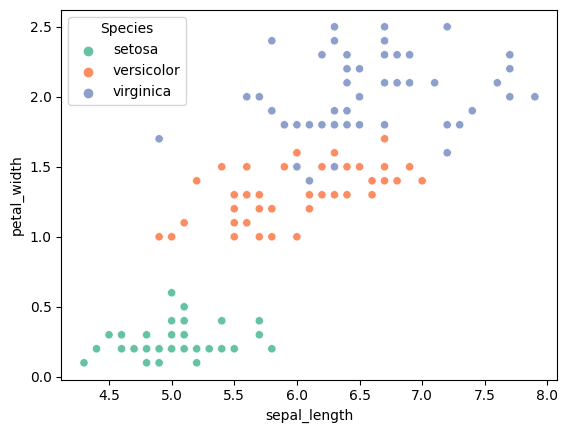

In [10]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_width', hue='species', palette='Set2')
plt.legend(title='Species');

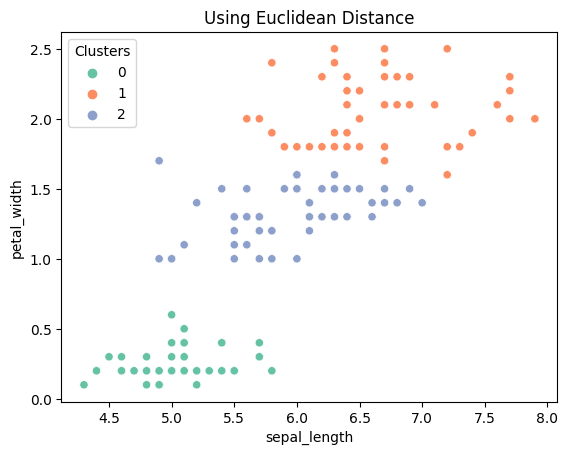

In [11]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_width', hue=clusters, palette='Set2')
plt.title('Using Euclidean Distance')
plt.legend(title='Clusters');

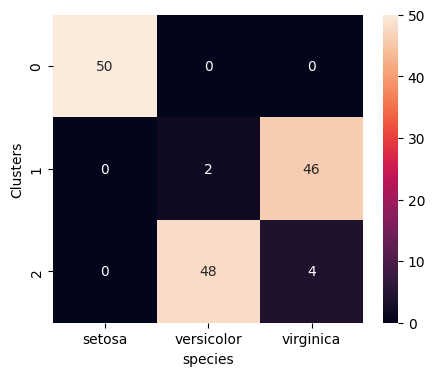

In [12]:
plt.figure(figsize=(5,4))
tab = pd.crosstab(clusters, iris.species)
sns.heatmap(tab, annot=True)
plt.ylabel('Clusters');

## Using Mahnattan Distance

In [13]:
centers, clusters = KMeans(X, k=3, n_iter=500, dist_type='manhattan', random_state=0)

In [14]:
centers

array([[0.63367089, 0.77909091, 0.21188406, 0.0984    ],
       [0.86589121, 0.69963145, 0.83352918, 0.84540541],
       [0.74964838, 0.62518038, 0.63906142, 0.56761905]])

In [15]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

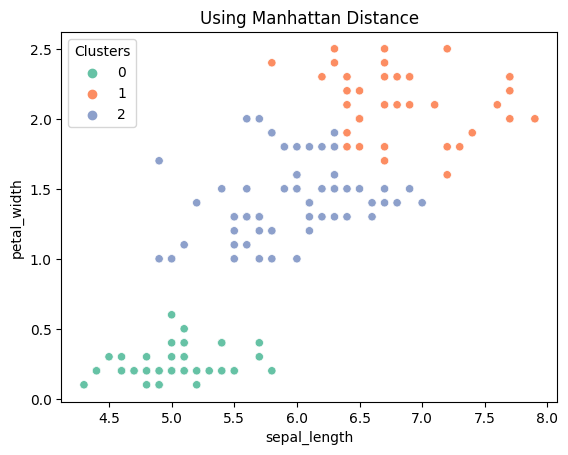

In [16]:
sns.scatterplot(
    data=iris, x='sepal_length', y='petal_width', 
    hue=clusters, palette='Set2')

plt.title('Using Manhattan Distance')
plt.legend(title='Clusters');

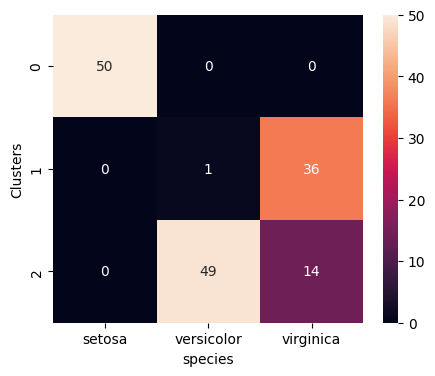

In [17]:
plt.figure(figsize=(5,4))
tab = pd.crosstab(clusters, iris.species)
sns.heatmap(tab, annot=True)
plt.ylabel('Clusters');